Neural Networks Practice using the MNIST dataset

In [15]:
#Imports
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os

In [4]:
#load in dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [5]:
#normalize pixels
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

In [10]:
#create model/network
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [12]:
#fit model with dataset
model.fit(x_train, y_train, epochs=3)
model.save('mnist_model.keras')

Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9636 - loss: 0.1186
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9766 - loss: 0.0744
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9834 - loss: 0.0520


In [13]:
#test model and print out statistics
loss, accuracy = model.evaluate(x_test, y_test)
print(loss)
print(accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9672 - loss: 0.1010
0.09101147949695587
0.9717000126838684


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
This digit is detected as a 1


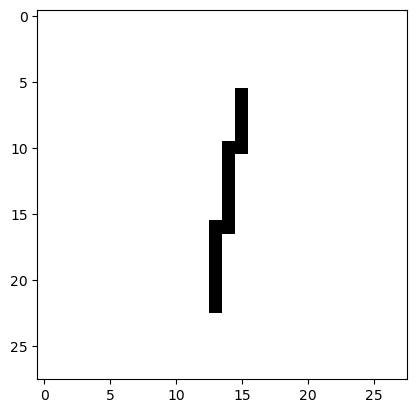

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
This digit is detected as a 2


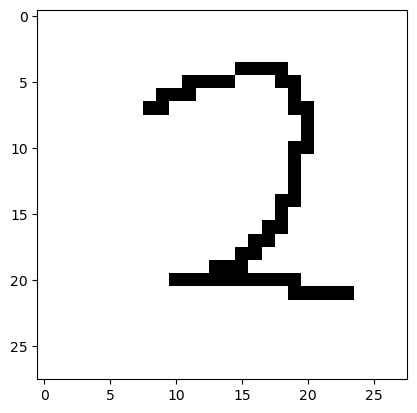

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
This digit is detected as a 3


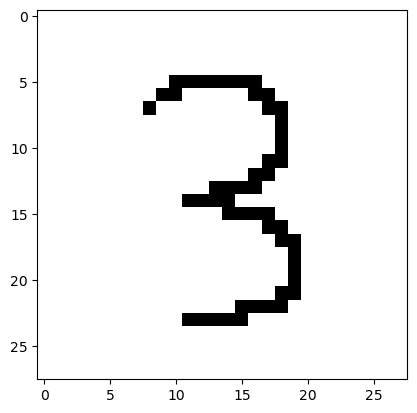

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
This digit is detected as a 9


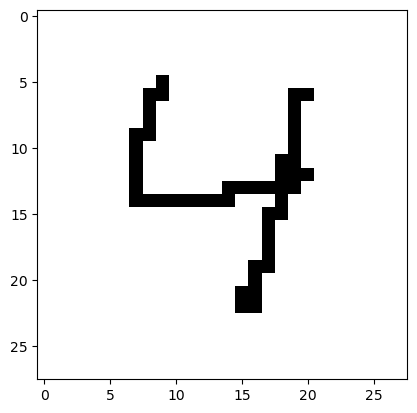

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
This digit is detected as a 3


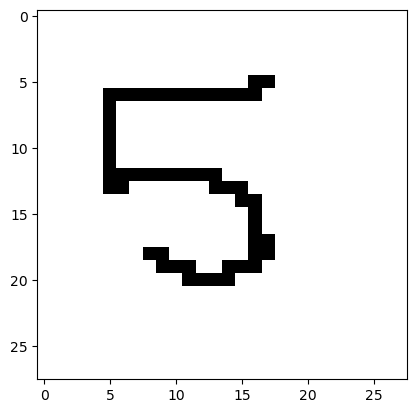

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
This digit is detected as a 6


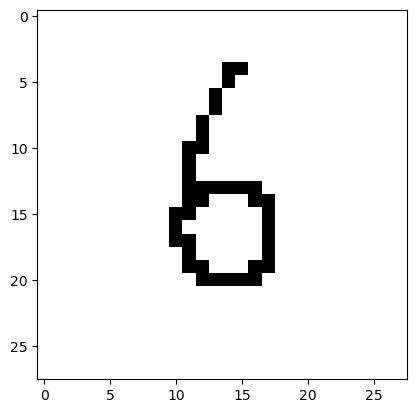

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
This digit is detected as a 7


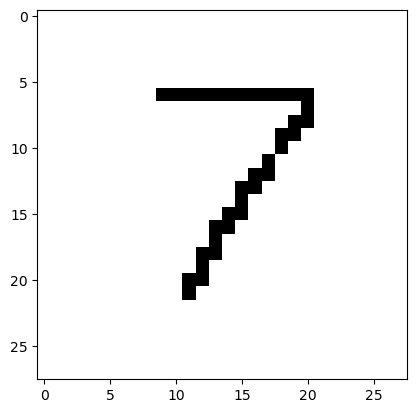

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
This digit is detected as a 3


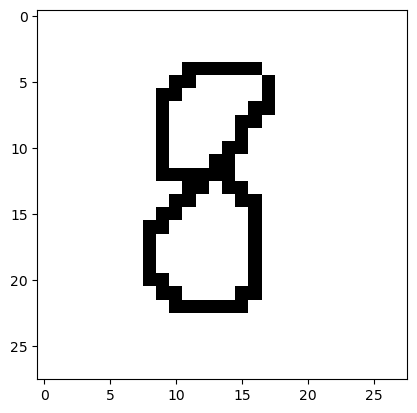

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
This digit is detected as a 9


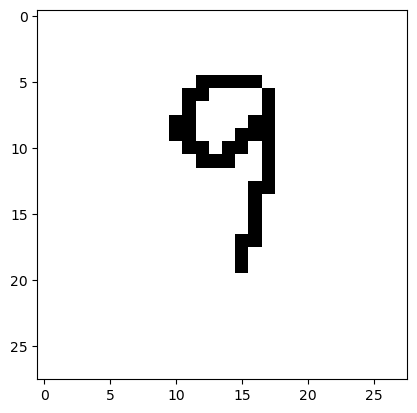

In [20]:
#test model against homemade images
image_number=1
while os.path.isfile(f"digits/digit{image_number}.png"):
    try:
        img = cv2.imread(f"digits/digit{image_number}.png")[:,:,0]
        img = np.invert(np.array([img]))
        prediction = model.predict(img)
        print(f"This digit is detected as a {np.argmax(prediction)}")
        plt.imshow(img[0], cmap=plt.cm.binary)
        plt.show()
    except:
        print("Error")
    finally:
        image_number += 1